In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [4]:
url = './data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [11]:
bikes.rename(columns={'temp':'temp_celsius',
                      'atemp':'atemp_celsius',
                      'windspeed': 'windspeed_knots',
                      'casual': 'num_casual_users',
                      'registered': 'num_registered_users',
                      'season': 'season_num',
                      'holiday': 'is_holiday',
                      'workingday': 'is_workingday',
                      'humidity': 'humidity_percent',
                      'count': 'num_total_users'
                      },
             inplace=True
             )


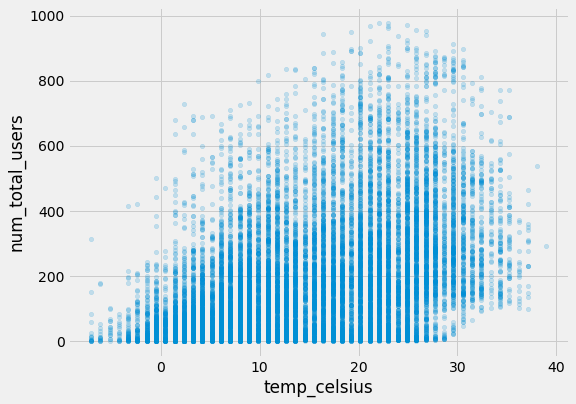

In [13]:
bikes.plot(kind='scatter', x='temp_celsius', y='num_total_users', alpha=.2)

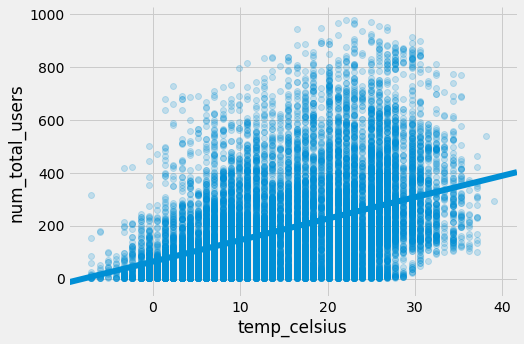

In [15]:
sns.lmplot(x='temp_celsius',
           y='num_total_users',
           data = bikes,
           aspect=1.5, #aspect ratio width:height
           scatter_kws={'alpha':0.2}
           );

In [17]:
lr_celsius = LinearRegression()

In [19]:
lr_celsius = LinearRegression()
X = bikes.loc[:, ['temp_celsius']]
y = bikes.loc[:, 'num_total_users']
lr_celsius.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:

bikes.loc[:, 'predictions'] = lr_celsius.predict(X)

In [23]:
bikes

,season_num,is_holiday,is_workingday,weather,temp_celsius,atemp_celsius,humidity_percent,windspeed_knots,num_casual_users,num_registered_users,num_total_users,predictions
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,3.28,3.0014,81,0.0000,3,13,16,91.475185
2011-01-01 01:00:00,1,0,0,1,2.34,1.9982,80,0.0000,8,32,40,83.849287
2011-01-01 02:00:00,1,0,0,1,2.34,1.9982,80,0.0000,5,27,32,83.849287
2011-01-01 03:00:00,1,0,0,1,3.28,3.0014,75,0.0000,3,10,13,91.475185
2011-01-01 04:00:00,1,0,0,1,3.28,3.0014,75,0.0000,0,1,1,91.475185
2011-01-01 05:00:00,1,0,0,2,3.28,1.0016,75,0.0896,0,1,1,91.475185
2011-01-01 06:00:00,1,0,0,1,2.34,1.9982,80,0.0000,2,0,2,83.849287
2011-01-01 07:00:00,1,0,0,1,1.40,1.0016,86,0.0000,1,2,3,76.223388
2011-01-01 08:00:00,1,0,0,1,3.28,3.0014,75,0.0000,1,7,8,91.475185


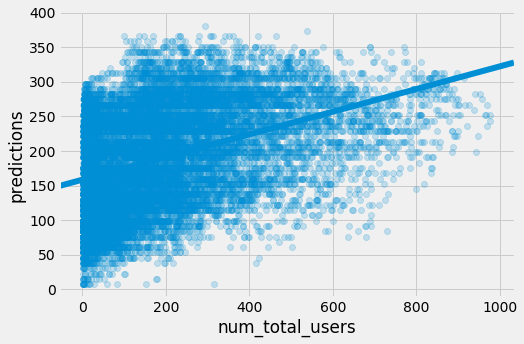

In [24]:
sns.lmplot(x='num_total_users',
           y='predictions',
           data = bikes,
           aspect=1.5, #aspect ratio width:height
           scatter_kws={'alpha':0.2}
           );

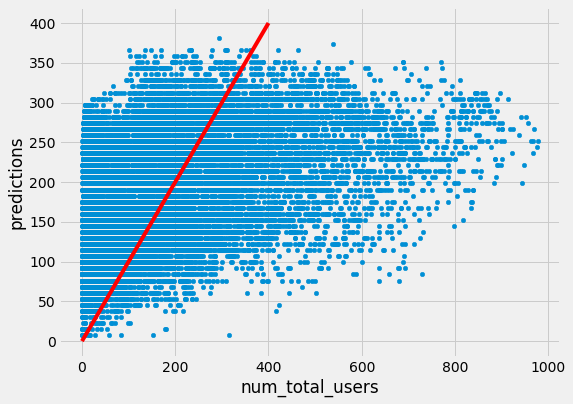

In [25]:
fig, ax = plt.subplots()
bikes.plot(kind='scatter', x='num_total_users', y='predictions', ax=ax)
ax.plot([0,400], [0,400], 'r')

In [30]:
bikes.drop('predictions', axis=1, inplace=True)

In [31]:
X = bikes.loc[:, ['season_num', 'is_holiday', 'is_workingday', 'weather', 'temp_celsius',
       'atemp_celsius', 'humidity_percent', 'windspeed_knots']]

In [32]:
assert isinstance(y, pd.Series)
assert isinstance(X, pd.DataFrame)
assert y.shape[0] == bikes.shape[0]
assert X.shape == (bikes.shape[0], bikes.shape[1] - 3)

In [37]:
lr_all = LinearRegression()

In [38]:
lr_all.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
bikes.loc[:, 'predictions'] = lr_all.predict(X)

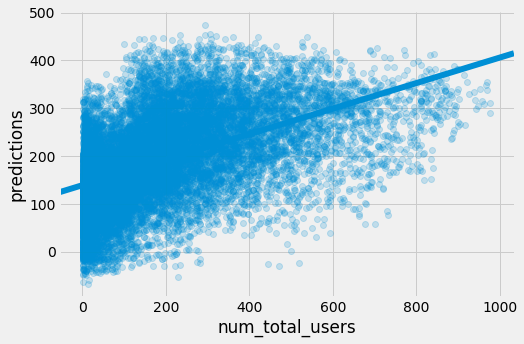

In [41]:
sns.lmplot(x = 'num_total_users',
          y = 'predictions',
          data=bikes,
          aspect=1.5,
          scatter_kws={'alpha':0.2})

In [42]:
bikes.drop('predictions', axis=1, inplace=True)

In [55]:
lr_all.intercept_


216.09930303024342

In [56]:
lr_all.coef_

array([ 19.80244456, -21.83281619,   3.31021316,   8.51301983,
         1.4708144 ,   4.43306071,  -3.04462961,  52.92027726])

In [57]:
X.columns

Index(['season_num', 'is_holiday', 'is_workingday', 'weather', 'temp_celsius',
       'atemp_celsius', 'humidity_percent', 'windspeed_knots'],
      dtype='object')

In [58]:
help(lr_all)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 |

In [61]:
feature_cols = ['temp_celsius', 'season_num', 'weather', 'humidity_percent']

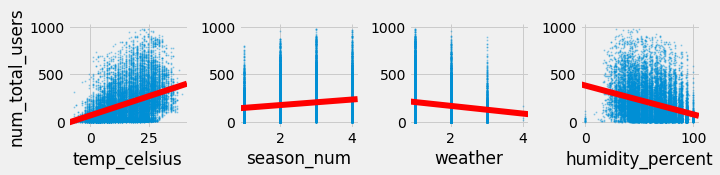

In [63]:
sns.pairplot(bikes,
            x_vars=feature_cols,
            y_vars='num_total_users',
            kind='reg',
            plot_kws={'scatter_kws': {'s':1, 'alpha':.3},
                      'line_kws': {'color':'red'}
                     }
            );

In [64]:
pd.crosstab(bikes.loc[:, 'season_num'], bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season_num,,,,,,,,,,,,
1,1429,1341,949,0,0,0,0,0,0,0,0,523
2,0,0,524,1437,1488,960,0,0,0,0,0,0
3,0,0,0,0,0,480,1488,1475,1053,0,0,0
4,0,0,0,0,0,0,0,0,384,1451,1437,960


/Users/naidaire/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


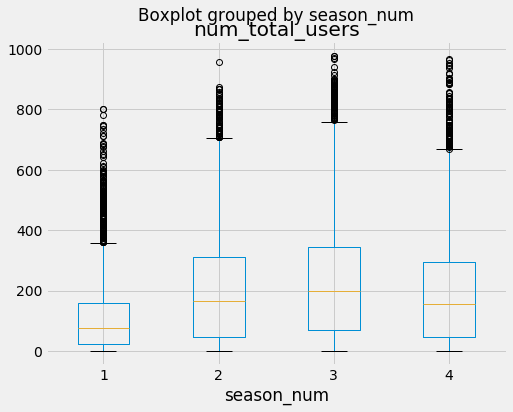

In [65]:
bikes.boxplot(column='num_total_users', by='season_num');

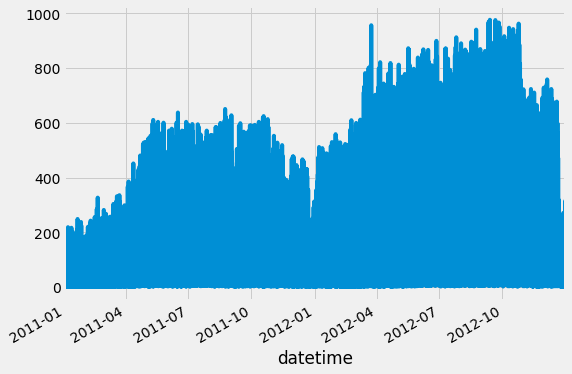

In [67]:
bikes.loc[:, 'num_total_users'].plot();

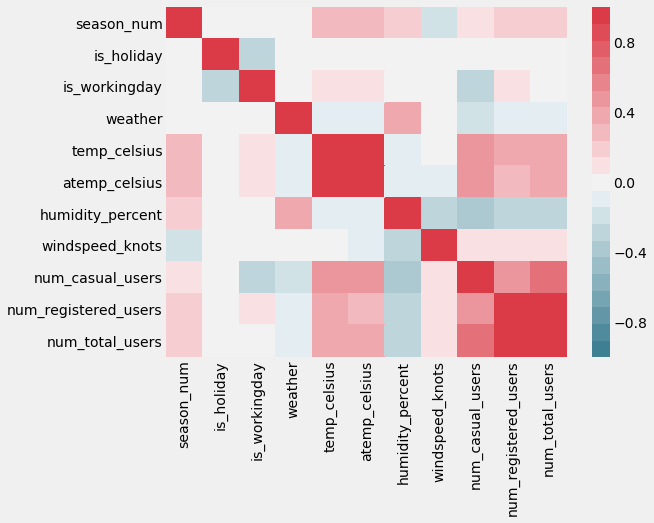

In [68]:
sns.heatmap(bikes.corr(),
           vmin=-1,
           vmax=1,
           cmap=sns.diverging_palette(220, 10, n=21),
           );

In [77]:
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]
pred2 = [10, 7, 5, 13]

In [78]:
from sklearn import metrics

In [79]:
print(metrics.mean_absolute_error(true, pred), metrics.mean_squared_error(true, pred))
print(metrics.mean_absolute_error(true, pred2), metrics.mean_squared_error(true, pred2))

2.0 7.5
2.0 16.0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
#define function that calculates RMSE for the bikes model

def train_test_rmse(df, feature_cols):
    X = df.loc[:, feature_cols]
    y = df.loc[:, 'num_total_users']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [83]:
print(train_test_rmse(bikes, ['temp_celsius', 'season_num', 'weather', 'humidity_percent']))
print(train_test_rmse(bikes, ['temp_celsius', 'season_num', 'weather']))
print(train_test_rmse(bikes, ['temp_celsius', 'season_num', 'humidity_percent']))

158.029161618
166.532973702
158.05455277


In [87]:
X = bikes.loc[:, ['temp_celsius']]
y = bikes.loc[:, 'num_total_users']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

null_pred = np.ones(y_test.shape) # ones creates an array with all 1.0s
null_pred *= y_train.mean()
np.sqrt(metrics.mean_squared_error(y_test, null_pred))

182.37729489845944

In [96]:
bikes_sample_seasons = bikes.loc[::1000, :]
dummies_weather = pd.get_dummies(bikes_sample_seasons, columns=['season_num'])
dummies_weather.drop('season_num_1', axis=1, inplace=True)

In [97]:
dummies_weather

,is_holiday,is_workingday,weather,temp_celsius,atemp_celsius,humidity_percent,windspeed_knots,num_casual_users,num_registered_users,num_total_users,season_num_2,season_num_3,season_num_4
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,3.28,3.0014,81,0.0000,3,13,16,0,0,0
2011-02-14 08:00:00,0,1,1,9.86,9.9974,40,0.4627,7,249,256,0,0,0
2011-03-29 05:00:00,0,1,1,2.34,-2.0014,37,0.2537,0,8,8,1,0,0
2011-05-09 22:00:00,0,1,1,16.44,17.0000,68,0.0896,21,95,116,1,0,0
2011-06-20 14:00:00,0,1,1,23.02,24.9992,61,0.1045,45,130,175,1,0,0
2011-08-01 06:00:00,0,1,1,23.02,24.0026,83,0.0896,3,97,100,0,1,0
2011-09-12 14:00:00,0,1,1,26.78,28.0022,51,0.1642,60,129,189,0,1,0
2011-10-24 07:00:00,0,1,2,9.86,9.9974,94,0.1045,11,274,285,0,0,1
2011-12-05 00:00:00,0,1,1,7.04,5.9978,87,0.0896,3,21,24,0,0,1


In [98]:
pd.get_dummies(bikes, columns=['weather']).drop('weather_1', axis=1)

,season_num,is_holiday,is_workingday,temp_celsius,atemp_celsius,humidity_percent,windspeed_knots,num_casual_users,num_registered_users,num_total_users,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,3.28,3.0014,81,0.0000,3,13,16,0,0,0
2011-01-01 01:00:00,1,0,0,2.34,1.9982,80,0.0000,8,32,40,0,0,0
2011-01-01 02:00:00,1,0,0,2.34,1.9982,80,0.0000,5,27,32,0,0,0
2011-01-01 03:00:00,1,0,0,3.28,3.0014,75,0.0000,3,10,13,0,0,0
2011-01-01 04:00:00,1,0,0,3.28,3.0014,75,0.0000,0,1,1,0,0,0
2011-01-01 05:00:00,1,0,0,3.28,1.0016,75,0.0896,0,1,1,1,0,0
2011-01-01 06:00:00,1,0,0,2.34,1.9982,80,0.0000,2,0,2,0,0,0
2011-01-01 07:00:00,1,0,0,1.40,1.0016,86,0.0000,1,2,3,0,0,0
2011-01-01 08:00:00,1,0,0,3.28,3.0014,75,0.0000,1,7,8,0,0,0


In [101]:
bikes_sample_seasons = bikes.loc[::1000, :]
dummies = pd.get_dummies(bikes_sample_seasons, columns=['season_num'])
pd.concat([bikes_sample_seasons.loc[:, 'season_num'],
           dummies.loc[:, [col for col in dummies.columns if col.startswith('season')]]],
          axis=1)

dummies.drop('season_num_1', axis=1)

,is_holiday,is_workingday,weather,temp_celsius,atemp_celsius,humidity_percent,windspeed_knots,num_casual_users,num_registered_users,num_total_users,season_num_2,season_num_3,season_num_4
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,3.28,3.0014,81,0.0000,3,13,16,0,0,0
2011-02-14 08:00:00,0,1,1,9.86,9.9974,40,0.4627,7,249,256,0,0,0
2011-03-29 05:00:00,0,1,1,2.34,-2.0014,37,0.2537,0,8,8,1,0,0
2011-05-09 22:00:00,0,1,1,16.44,17.0000,68,0.0896,21,95,116,1,0,0
2011-06-20 14:00:00,0,1,1,23.02,24.9992,61,0.1045,45,130,175,1,0,0
2011-08-01 06:00:00,0,1,1,23.02,24.0026,83,0.0896,3,97,100,0,1,0
2011-09-12 14:00:00,0,1,1,26.78,28.0022,51,0.1642,60,129,189,0,1,0
2011-10-24 07:00:00,0,1,2,9.86,9.9974,94,0.1045,11,274,285,0,0,1
2011-12-05 00:00:00,0,1,1,7.04,5.9978,87,0.0896,3,21,24,0,0,1


In [109]:
from sklearn.linear_model import LinearRegression

In [116]:
bikes_dummies = pd.get_dummies(bikes, columns=['season_num']).drop('season_num_1', axis=1)
bikes_dummies.rename(columns={'season_num_2': 'spring', 'season_num_3': 'summer', 'season_num_4': 'fall'},
                     inplace=True)
feature_cols = ['temp_celsius', 'spring', 'summer', 'fall', 'humidity_percent']
X = bikes_dummies.loc[:, feature_cols]
y = bikes_dummies.loc[:, 'num_total_users']

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('temp_celsius', 9.7141966124817305),
 ('spring', -1.9124011354723525),
 ('summer', -46.365626853536064),
 ('fall', 55.501887315183467),
 ('humidity_percent', -2.8406865326033484)]

In [120]:
bikes.loc[:, 'hour'] = bikes.index.hour
hour_dummies = pd.get_dummies(bikes, columns=['hour'])
hour_dummies.drop('hour_0', axis=1, inplace=True)

In [125]:
bikes

,season_num,is_holiday,is_workingday,weather,temp_celsius,atemp_celsius,humidity_percent,windspeed_knots,num_casual_users,num_registered_users,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,3.28,3.0014,81,0.0000,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,2.34,1.9982,80,0.0000,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,2.34,1.9982,80,0.0000,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,3.28,3.0014,75,0.0000,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,3.28,3.0014,75,0.0000,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 05:00:00,1,0,0,2,3.28,1.0016,75,0.0896,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 06:00:00,1,0,0,1,2.34,1.9982,80,0.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 07:00:00,1,0,0,1,1.40,1.0016,86,0.0000,1,2,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 08:00:00,1,0,0,1,3.28,3.0014,75,0.0000,1,7,...,0,0,0,0,0,0,0,0,0,0


In [126]:
bikes.loc[:, 'daytime'] = ((bikes.loc[:, 'hour'] > 6) & (bikes.loc[:, 'hour'] < 21)).astype(int)

In [124]:
train_test_rmse(bikes, ['hour'])

168.89021556336135

In [127]:
print(train_test_rmse(bikes, ['hour']))

print(train_test_rmse(bikes, ['daytime']))

print(train_test_rmse(hour_dummies, ['hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23']))

168.890215563
147.178683462
129.047226244
